# Dominant Color Extraction from an Image

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [41]:
img = plt.imread("cat.jpg")

In [42]:
img.shape   #325489 = 463*703

(463, 703, 3)

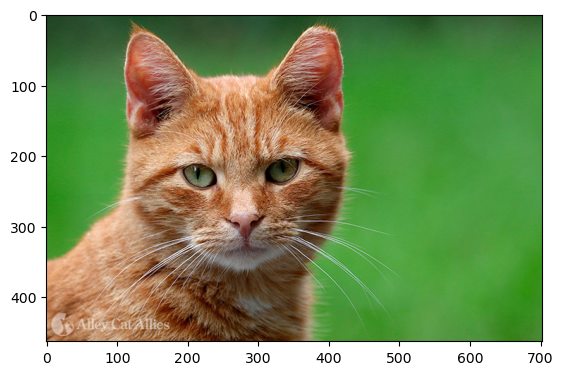

In [43]:
plt.imshow(img)

In [44]:
n =  img.shape[0]*img.shape[1]
n

325489

In [45]:
# flattening the image
all_pixels = img.reshape(n,3)  # 3 = R,G,B
all_pixels.shape

(325489, 3)

In [46]:
all_pixels[:5]    # in form of red,green,blue

array([[34, 69, 39],
       [32, 69, 38],
       [31, 68, 37],
       [32, 69, 38],
       [34, 69, 39]], dtype=uint8)

In [47]:
from sklearn.cluster import KMeans

In [48]:
model  = KMeans(n_clusters = 3)
model.fit(all_pixels)

KMeans(n_clusters=3)

In [49]:
centers = model.cluster_centers_.astype('uint8')
centers 

array([[ 70, 148,  58],
       [193, 149, 117],
       [ 88,  71,  41]], dtype=uint8)

### Regenrating our image using top 3 colours

In [50]:
new_img = np.zeros((n,3),dtype='uint8')
new_img.shape

(325489, 3)

In [51]:
centers

array([[ 70, 148,  58],
       [193, 149, 117],
       [ 88,  71,  41]], dtype=uint8)

In [52]:
model.labels_

array([2, 2, 2, ..., 0, 0, 0])

In [53]:
for i in range(n):
    group_idx = model.labels_[i]
    new_img[i] = centers[group_idx]

In [54]:
new_img.shape

(325489, 3)

In [55]:
new_img = new_img.reshape((463, 703, 3))

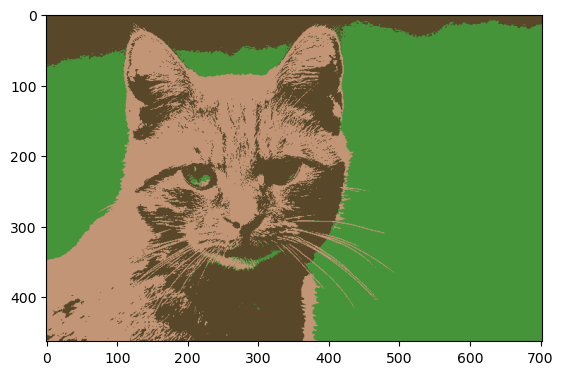

In [56]:
plt.imshow(new_img)
plt.show()